<a href="https://colab.research.google.com/github/YopaNelly/30-day-challenge-week-1-instructions/blob/main/DCT_Based_Block_Image_Compression_(JPEG_Principle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


Image loaded: 718x451, Channels: 3


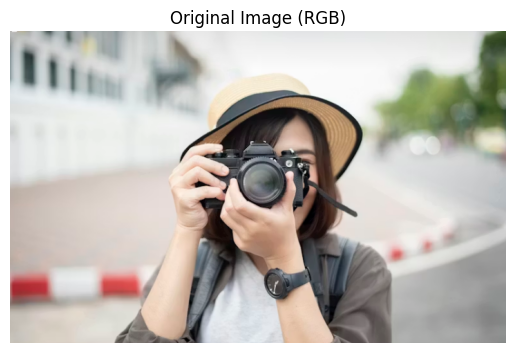

In [ ]:
# Load the image (change path to your image)
image = cv2.imread("lenna.png")  # OpenCV loads as BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image = np.float32(image)  # Convert to float for DCT

height, width, channels = image.shape
print(f"Image loaded: {width}x{height}, Channels: {channels}")

# Display original image
plt.imshow(image.astype(np.uint8))
plt.title("Original Image (RGB)")
plt.axis('off')
plt.show()


Explanation:

We load the image in RGB.

Convert it to float32 because DCT works on floats.

Display the original image for reference.

**Define Block Size and Quantization Matrix**

In [ ]:
block_size = 8  # Standard JPEG block size

# JPEG-like quantization matrix (same for all channels)
Q = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68,109,103, 77],
    [24, 35, 55, 64, 81,104,113, 92],
    [49, 64, 78, 87,103,121,120,101],
    [72, 92, 95, 98,112,100,103, 99]
])


Explanation:

DCT is applied per 8×8 block, just like JPEG.

The quantization matrix reduces high-frequency values, which achieves compression.

**Prepare Output Image**

In [ ]:
reconstructed = np.zeros_like(image)


Explanation:

We create an empty array to store the reconstructed image after compression.

**Apply Block-Based DCT Compression**

In [ ]:
for c in range(channels):  # Process each color channel separately
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i+block_size, j:j+block_size, c]

            # Skip incomplete blocks
            if block.shape != (block_size, block_size):
                continue

            # Shift pixel values from [0,255] to [-128,127]
            block = block - 128

            # Apply DCT
            dct_block = cv2.dct(block)

            # Quantization (lossy compression)
            quantized = np.round(dct_block / Q)

            # De-quantization
            dequantized = quantized * Q

            # Inverse DCT
            idct_block = cv2.idct(dequantized)

            # Shift back
            reconstructed[i:i+block_size, j:j+block_size, c] = idct_block + 128


Explanation:

Each 8×8 block is transformed using DCT → quantized → inverse DCT.

High-frequency details are reduced during quantization, which compresses the image.

**Clip Pixel Values**

In [ ]:
reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)


Explanation:

DCT + inverse DCT can produce values slightly outside 0–255.

Clipping ensures valid RGB pixel values.

**Display Original vs Compressed Image**

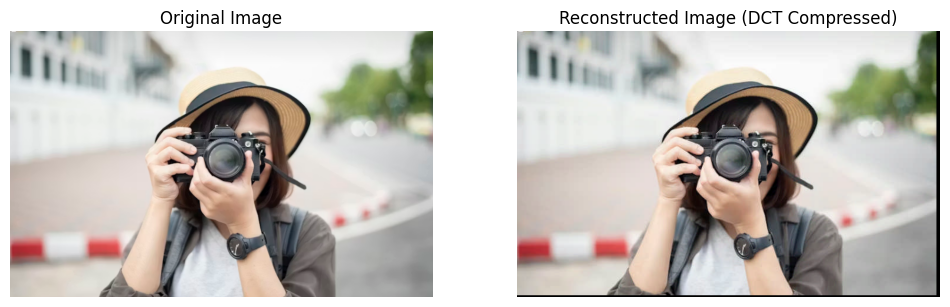

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image.astype(np.uint8))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Reconstructed Image (DCT Compressed)")
plt.imshow(reconstructed)
plt.axis('off')

plt.show()


Explanation:

You can now visually compare original vs compressed image.

Compression is lossy, but most visual content is preserved.

**Compute PSNR (Quality Metric)**

In [ ]:
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    return 20 * math.log10(255.0 / math.sqrt(mse))

psnr_value = psnr(image, reconstructed)
print(f"PSNR (Higher = Better Quality): {psnr_value:.2f} dB")


PSNR (Higher = Better Quality): 22.21 dB


Explanation:

PSNR measures how close the compressed image is to the original.

Higher PSNR → better quality.

**Show DCT Heatmap of First Block**

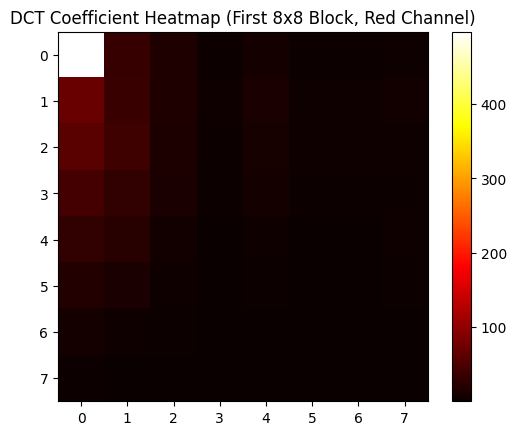

In [ ]:
first_block = image[0:8, 0:8, 0] - 128  # Red channel
dct_block = cv2.dct(first_block)

plt.imshow(np.abs(dct_block), cmap='hot')
plt.colorbar()
plt.title("DCT Coefficient Heatmap (First 8x8 Block, Red Channel)")
plt.show()


Explanation:

Heatmap shows how energy is concentrated in low-frequency coefficients.

High-frequency coefficients are small → discarded by quantization → compression achieved.